In [4]:
import pandas as pd
import xgboost as xgb
import numpy as np

In [5]:
FICHERO_RESEÑAS = '../GPT_transformer/data/reviews_random_forest.csv'

In [6]:
reviews = pd.read_csv(FICHERO_RESEÑAS)

In [7]:
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,expresiones,tfidf,palabras_complejas,tecnicismos,polaridad,subjetividad,coherencia
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,0,5.640761e-02,3,0,0.0,0.0,0.920000
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,0,5.551115e-17,2,0,0.0,0.0,1.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,0,5.749596e-02,5,0,0.0,0.0,0.857143
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,0,7.866846e-02,5,0,0.0,0.0,0.823529
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,0,7.357145e-02,4,0,0.0,0.0,0.953488


In [8]:
X = reviews.drop(columns=['reseñas', 'IA'])
y = reviews[['IA']]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [10]:
## Set n_estimators to be 10
xgb_clf.set_params(n_estimators=10)

## Set max_depth también a 3
xgb_clf.set_params(max_depth=3)
# Fit it to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
print(f"Accuracy Score: {accuracy_score(y_test, preds)}")
print(f"Precision Score: {precision_score(y_test, preds)}")
print(f"Recall Score: {recall_score(y_test, preds)}")
print(accuracy_score(y_train, xgb_clf.predict(X_train)))

Accuracy Score: 0.7890365448504983
Precision Score: 0.7523219814241486
Recall Score: 0.8379310344827586
0.8261047463175123


In [12]:
y_pred_rf = preds
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

# Imprimir resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7890
Precision: 0.7523
Recall: 0.8379
F1 Score: 0.7928
ROC-AUC: 0.7908
Confusion Matrix:
[[464 160]
 [ 94 486]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.79       624
           1       0.75      0.84      0.79       580

    accuracy                           0.79      1204
   macro avg       0.79      0.79      0.79      1204
weighted avg       0.79      0.79      0.79      1204



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

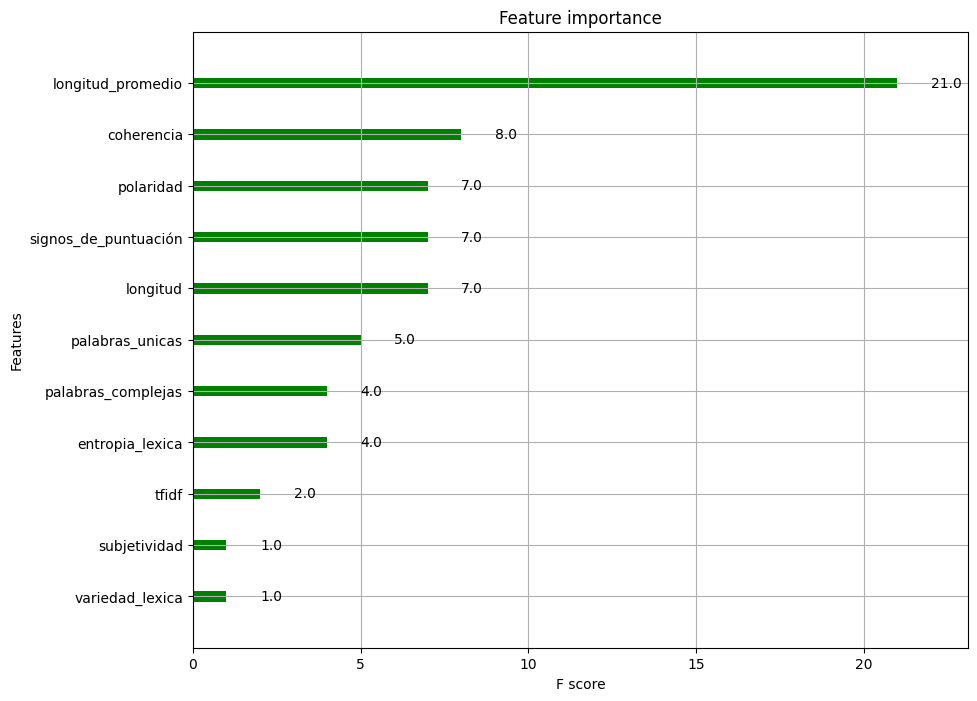

In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf, color="green")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

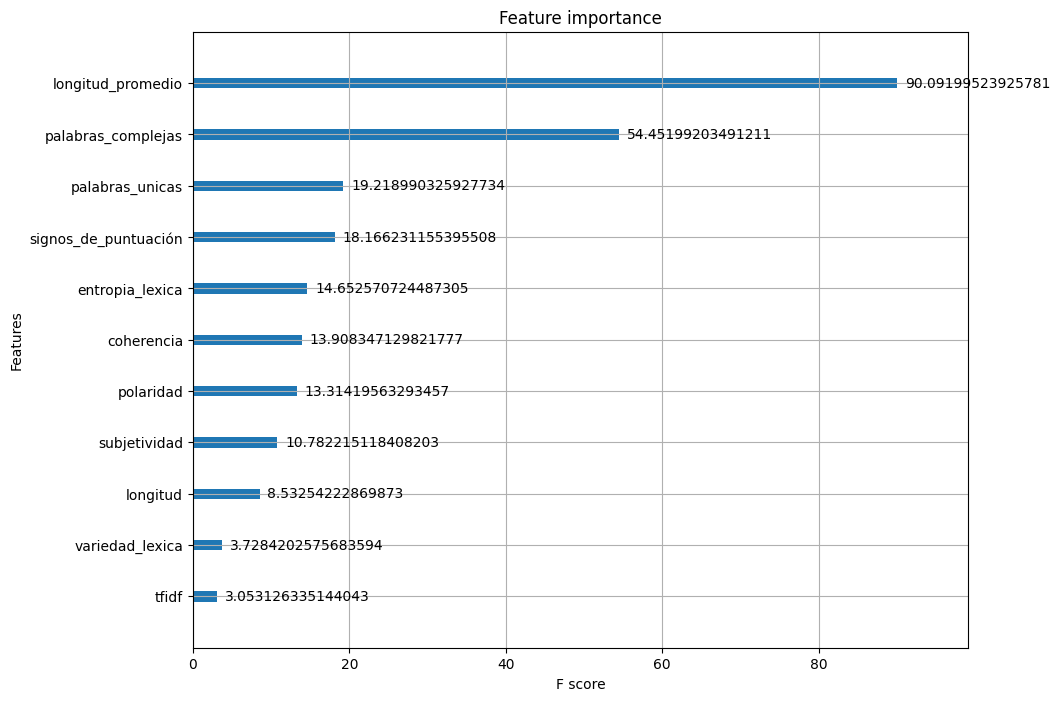

In [14]:
xgb.plot_importance(xgb_clf, importance_type="gain")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

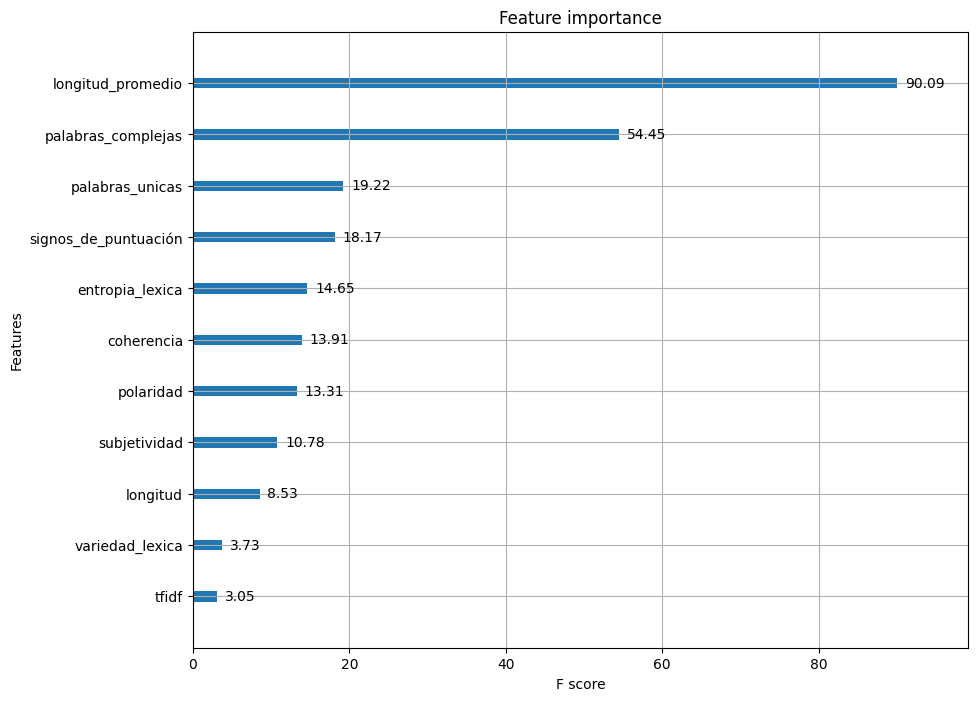

In [15]:
xgb.plot_importance(xgb_clf, importance_type="gain", values_format='{v:.2f}')

<Axes: >

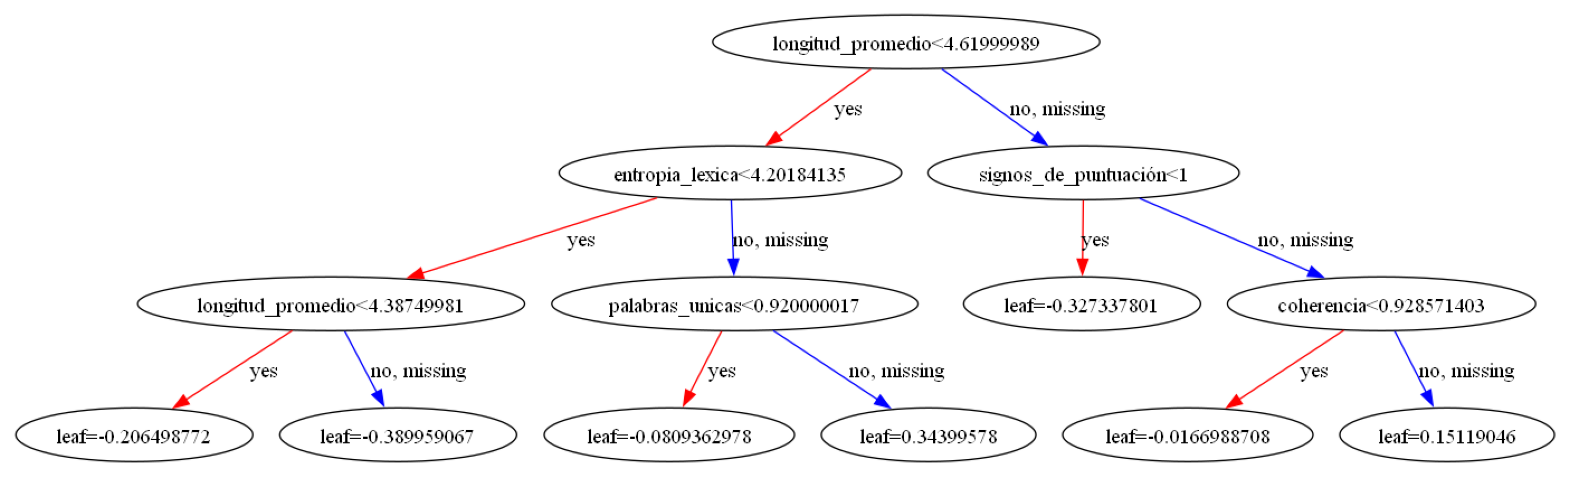

In [16]:
matplotlib.rcParams['figure.figsize'] = (20.0, 8)

# Plot the first tree
xgb.plot_tree(xgb_clf, num_trees=5)

In [17]:
bookings_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [18]:
params = {"objective":"binary:logistic", 'max_depth': 3}

# Instantiate a CV object with 3 folds and 10 boosting rounds
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3, num_boost_round=10, seed=123, metrics="error")

# Inspect the results: how are they stored?
xgb_cv

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.205404,0.009490,0.229948,0.005573
1,0.193127,0.004790,0.214814,0.004712
2,0.190059,0.005172,0.210724,0.006792
3,0.185558,0.007068,0.202543,0.011273
4,0.180444,0.005742,0.200493,0.005139
5,0.174305,0.002654,0.200086,0.010262
6,0.173896,0.001801,0.197224,0.012720
7,0.172259,0.002619,0.195589,0.015126
8,0.169804,0.002520,0.194770,0.014012
9,0.171645,0.001307,0.193950,0.011269


In [19]:
# Caclulate accuracy
accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]

# Print the baseline accuracy
print("baseline cv accuracy:", accuracy)

baseline cv accuracy: 0.8060495520618219


In [20]:
bst = xgb.XGBClassifier(random_state=123)
## Set n_estimators to be 10
bst.set_params(n_estimators=10)
## Set max_depth también a 3
bst.set_params(max_depth=3)
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [21]:
print(accuracy_score(y_train,bst.predict(X_train)))
print(accuracy_score(y_test,bst.predict(X_test)))

0.8261047463175123
0.7890365448504983


In [22]:
# Increase the number of trees to 40 and set the early stopping rounds to 10
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3,
                    num_boost_round=40,early_stopping_rounds=10, seed=123,  metrics="error")

# Caclulate accuracy
accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]

# Print the accuracy
print("accuracy:", accuracy)

accuracy: 0.8187370303934721


In [23]:
# Increase the number of trees to 40_000 and set the early stopping rounds to 10
xgb_cv = xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3,
                    num_boost_round=40000,early_stopping_rounds=10, seed=123,  metrics="error")

# Caclulate accuracy
accuracy= 1 - xgb_cv["test-error-mean"].iloc[-1]

# Print the accuracy
print("accuracy:", accuracy)

accuracy: 0.8187370303934721


In [24]:
# Set max_depth to 10
xgb_clf.set_params(max_depth=10)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.771594684385382

In [25]:
accuracy_score(y_train, xgb_clf.predict(X_train)) #overfitted?

0.9410801963993454

In [26]:
# Set colsample_bytree to 0.5 
xgb_clf.set_params(colsample_bytree=0.5)
# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.792358803986711

In [27]:
# Set gamma to .25 
xgb_clf.set_params(gamma=0.25)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.7832225913621262

In [35]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import xgboost as xgb

# Define a parameter grid
rs_param_grid = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(3, 12))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0, 0.001, 0.01, 0.1, 1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.5, 0.75, 1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.01, 0.5, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [10, 25, 40]
}

# Insantiate XGBoost Clasifier 
xgb_clf = xgb.XGBClassifier(random_state=123, early_stopping_rounds=10)

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs = RandomizedSearchCV(estimator=xgb_clf, param_distributions=rs_param_grid, 
                            cv=3, n_iter=500, verbose=2, random_state=123)

# Train the model on the training set with early stopping
xgb_rs.fit(X_train_split, y_train_split, eval_set=[(X_val_split, y_val_split)], verbose=True)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[0]	validation_0-logloss:0.59180
[1]	validation_0-logloss:0.52351
[2]	validation_0-logloss:0.49447
[3]	validation_0-logloss:0.47918
[4]	validation_0-logloss:0.46208
[5]	validation_0-logloss:0.45769
[6]	validation_0-logloss:0.45713
[7]	validation_0-logloss:0.45520
[8]	validation_0-logloss:0.44685
[9]	validation_0-logloss:0.44610
[10]	validation_0-logloss:0.45002
[11]	validation_0-logloss:0.45258
[12]	validation_0-logloss:0.44555
[13]	validation_0-logloss:0.45040
[14]	validation_0-logloss:0.45355
[15]	validation_0-logloss:0.46145
[16]	validation_0-logloss:0.47177
[17]	validation_0-logloss:0.47237
[18]	validation_0-logloss:0.47755
[19]	validation_0-logloss:0.47781
[20]	validation_0-logloss:0.47615
[21]	validation_0-logloss:0.47585
[CV] END alpha=1, learning_rate=0.33666666666666667, max_depth=6, n_estimators=40, subsample=0.5; total time=   0.0s
[0]	validation_0-logloss:0.58711
[1]	validation_0-logloss:0.52796
[2]	validation_

In [29]:
# {'subsample': 1, 'n_estimators': 25, 'max_depth': 4, 'learning_rate': 0.17333333333333334, 'alpha': 0}
# Best accuracy found:  0.8219806558417284

In [30]:
# Hacemos el xgboost con estos hiperparámetros
xgb_clf = xgb.XGBClassifier(random_state=123)


In [31]:
xgb_clf.set_params(max_depth=4, n_estimators=25, subsample=1, learning_rate= 0.17333333333333334, alpha=0)

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.17333333333333334,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
xgb_cv= xgb.cv(dtrain=bookings_dmatrix, params=params, nfold=3,
                    num_boost_round=40000,early_stopping_rounds=10, seed=123,  metrics="error")

In [33]:
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)

In [34]:
accuracy_score(y_test, preds)

0.7931893687707641